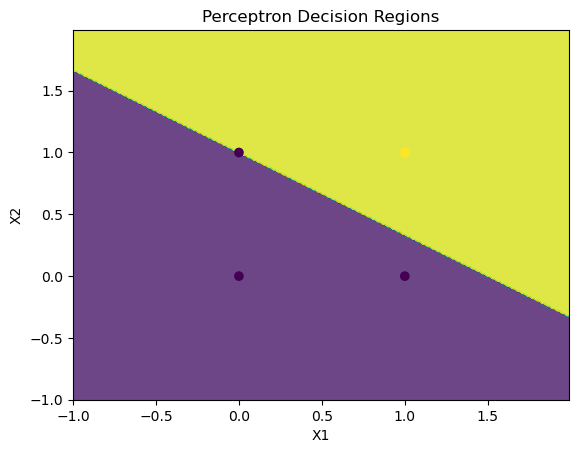

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, -1, -1, 1])

w = np.zeros(X.shape[1])
b = 0

for _ in range(6):
    for i in range(X.shape[0]):
        y_pred = np.sign(np.dot(X[i], w) + b)
        
        if y_pred != Y[i]:
            w += 0.3 * Y[i] * X[i]
            b += 0.3 * Y[i]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Regions')
plt.show()

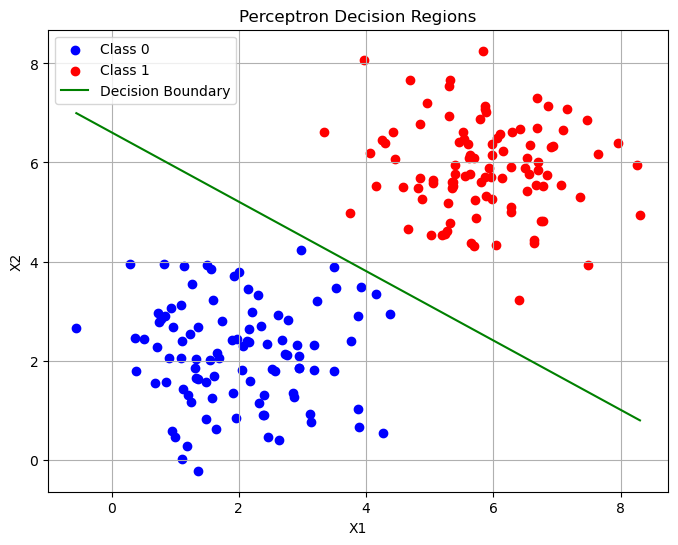

In [2]:
import numpy as np
import matplotlib.pyplot as plt
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
    def train(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
    def predict(self, X):
        summation = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.where(summation >= 0, 1, 0)
# Generate random data points for two classes
np.random.seed(0)
num_samples = 100
class_0 = np.random.normal(loc=[2, 2], scale=[1, 1], size=(num_samples, 2))
class_1 = np.random.normal(loc=[6, 6], scale=[1, 1], size=(num_samples, 2))
# Concatenate the data points and create labels
X = np.vstack([class_0, class_1])
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])
# Create and train the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=1000)
perceptron.train(X, y)
# Plot the data points for each class
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')
# Plot the decision boundary
w0, w1, w2 = perceptron.weights
slope = -w1 / w2
intercept = -w0 / w2
x_boundary = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_boundary = slope * x_boundary + intercept
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')
plt.title('Perceptron Decision Regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()